# FEATURES PREPARATION
#### Was chose four exogenous attributes to help us understanding the impact of economy in the game market sales, it was found in the internet in different sources and the links will be attach in the explanations. Was chose the Russia economy indexes as GDP, MOEX, Dollar equivalence and unemployment rate. These features was chose because are the basic economy indexes that can to influency in the sales of anything in the country.

# Preparing the RUB in Dollar data
#### The data was found in https://www.investing.com/currencies/rub-usd-converter#historical_data_converter.  I selected the date interval before the download to simply the data preparation, the data interval was 01.01.2013 to 30.06.2015.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [2]:
raw_RubinDolar = pd.read_csv("raw_RUBinDolar.csv", sep = ";");

In [3]:
raw_RubinDolar.shape

(786, 6)

In [4]:
raw_RubinDolar = raw_RubinDolar.dropna()

In [5]:
raw_RubinDolar.head()

,Data,Último,Abertura,Máxima,Mínima,Var%
0,01.01.2013,"0,0327","0,0327","0,0327","0,0327","-0,3"
1,02.01.2013,"0,0331","0,0327","0,0333","0,0327","1,22"
2,03.01.2013,"0,033","0,0331","0,0333","0,0329","-0,3"
3,04.01.2013,"0,033","0,033","0,0331","0,0327",0
4,07.01.2013,"0,033","0,033","0,0331","0,0328",0


#### In this moment was decided that the unique column that is important to us in this moment is the aperture Value, so we will delete the other columns.

In [6]:
del raw_RubinDolar['Último']
del raw_RubinDolar['Máxima']
del raw_RubinDolar['Mínima']
del raw_RubinDolar['Var%']

#### Another observation is the dataset doesn't have the weekend days, so we need to add it, because the sales we have analysing occur in the weekends. We can repeat the previous value, friday values, for the weekend without expecting negative impacts.

In [7]:
raw_RubinDolar.columns = ['Date','Value']
raw_RubinDolar['Date'] = pd.to_datetime(raw_RubinDolar['Date'], format = '%d.%m.%Y')
raw_RubinDolar= raw_RubinDolar.sort_values(['Date'], ascending=True)
raw_RubinDolar.set_index('Date', inplace=True)
raw_RubinDolar.head()

,Value
Date,
2013-01-01,"0,0327"
2013-01-02,"0,0327"
2013-01-03,"0,0331"
2013-01-04,"0,033"
2013-01-07,"0,033"


#### How we can see that the decimal was represented by a comma, we need to replace to point.

In [8]:
raw_RubinDolar['Value'] = raw_RubinDolar['Value'].str.replace(",",".")
raw_RubinDolar['Value'] = pd.to_numeric(raw_RubinDolar['Value'] )
raw_RubinDolar.head()

,Value
Date,
2013-01-01,0.0327
2013-01-02,0.0327
2013-01-03,0.0331
2013-01-04,0.0330
2013-01-07,0.0330


#### Here we will creat a treatment for weekend days values repeating the fridays values for it.

In [9]:
raw_RubinDolar = raw_RubinDolar.resample('D').sum()
raw_RubinDolar['Value'] = raw_RubinDolar['Value'].replace(0, np.nan)
for n,i in enumerate(raw_RubinDolar['Value']):
        if np.isnan(raw_RubinDolar['Value'][n]):
            raw_RubinDolar['Value'][n] = raw_RubinDolar['Value'][n-1]
raw_RubinDolar = raw_RubinDolar.reset_index()
raw_RubinDolar.head(7)

,Date,Value
0,2013-01-01,0.0327
1,2013-01-02,0.0327
2,2013-01-03,0.0331
3,2013-01-04,0.0330
4,2013-01-05,0.0330
5,2013-01-06,0.0330
6,2013-01-07,0.0330


C:\Users\Anthony\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


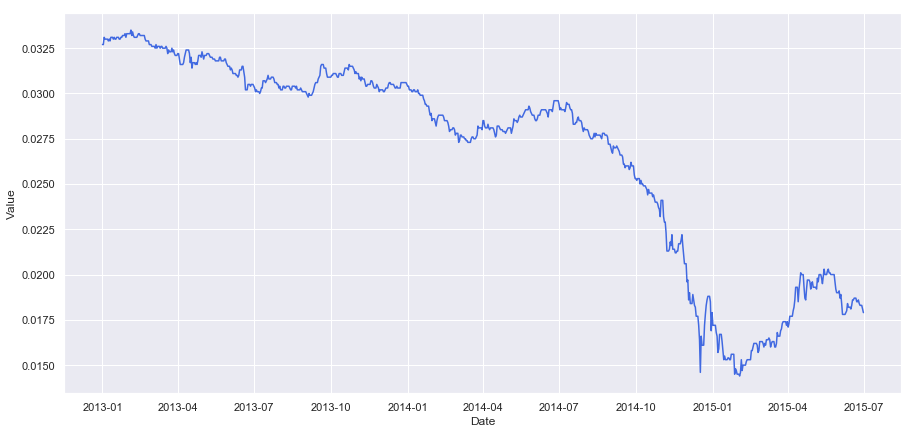

In [10]:
dim = (15, 7)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="Value", color = 'royalblue',data=raw_RubinDolar)

In [11]:
raw_RubinDolar.to_csv("RubinDolar.csv", header = True, index = False)
raw_RubinDolar.shape

(911, 2)

#### So, everything looks like ok in this data and we can continue to preparing the features.

In [12]:
raw_RubinDolar.to_csv("RubinDolar.csv", header = True, index = False)

# Preparing the Russia GDP data
#### The data was found in https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2016&locations=RU&most_recent_year_desc=false&start=2013&view=chart.
#### I selected the date interval before the downloaded to simply the data preparation, the data interval was 2012 to 2016. But not always the data cames as we like, and in this case we need to filter the Russia in the middle of theses others countries, besides to transpose the table. This data has two separation, so we need to treat it removing the double quotation marks.

In [13]:
raw_GDP = pd.read_csv("raw_GDP.csv", sep = ',', header = None)

In [14]:
raw_GDP.shape

(265, 1)

In [15]:
raw_GDP.columns = ['col']
raw_GDP.head()

,col
0,"Country Name,""Country Code"",""Indicator Name"",""..."
1,"Aruba,""ABW"",""GDP (current US$)"",""NY.GDP.MKTP.C..."
2,"Afghanistan,""AFG"",""GDP (current US$)"",""NY.GDP...."
3,"Angola,""AGO"",""GDP (current US$)"",""NY.GDP.MKTP...."
4,"Albania,""ALB"",""GDP (current US$)"",""NY.GDP.MKTP..."


In [16]:
raw_GDP['col'] = raw_GDP['col'].str.replace('"',' ')
raw_GDP.to_csv("medium_GDP.csv", header = None, index = False)

In [17]:
medium_GDP = pd.read_csv("medium_GDP.csv", sep = ' , ');
medium_GDP.head()

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,"""Country Name, Country Code",Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,"2018 ,"""
0,"""Aruba, ABW",GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,","""
1,"""Afghanistan, AFG",GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,1.243909e+10,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,"19362969582.3643 ,"""
2,"""Angola, AGO",GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,"105750987618.63 ,"""
3,"""Albania, ALB",GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,"15058879128.6536 ,"""
4,"""Andorra, AND",GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,"3236543909.34844 ,"""


#### In this case, due the incorrect formating of GDP dataset we have two information in the first column, so we need treat it to extract only the information wanted, after this treat the dataset will rename to medium_GDP.

In [18]:
medium_GDP = pd.read_csv("medium_GDP.csv", sep = ' , ');
for n,i in enumerate(medium_GDP['"Country Name, Country Code']):    
    transition = str(medium_GDP['"Country Name, Country Code'][n]).split(', ')[0]
    medium_GDP['"Country Name, Country Code'][n] = str(transition).replace('"','')
medium_GDP = medium_GDP.rename(columns = {'"Country Name, Country Code':'Country_Name'}) 
medium_GDP.head()

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Country_Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,"2018 ,"""
0,Aruba,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,","""
1,Afghanistan,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,1.243909e+10,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,"19362969582.3643 ,"""
2,Angola,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,"105750987618.63 ,"""
3,Albania,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.186135e+10,1.302506e+10,"15058879128.6536 ,"""
4,Andorra,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.013387e+09,"3236543909.34844 ,"""


#### Searching for Countries with name starts with "R"

In [19]:
medium_GDP.loc[medium_GDP['Country_Name'].str.startswith("R")]

,Country_Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,"2018 ,"""
199,Romania,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.741037e+11,1.662252e+11,1.834432e+11,1.711963e+11,1.909491e+11,1.996268e+11,1.778935e+11,1.884941e+11,2.114069e+11,"239552516744.469 ,"""
200,Russian Federation,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.222644e+12,1.524917e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.059984e+12,1.363594e+12,1.282724e+12,1.578624e+12,"1657553765580.67 ,"""
201,Rwanda,GDP (current US$),NY.GDP.MKTP.CD,119000024.0,122000016.0,125000008.0,128000000.0,129999994.0,148799980.0,1.245257e+08,...,5.373089e+09,5.783153e+09,6.563321e+09,7.334918e+09,7.621923e+09,8.016592e+09,8.277613e+09,8.475682e+09,9.135454e+09,"9509003196.73999 ,"""


#### So now, we have an acceptable dataframe and we can apply the filter to obtain just Russian Federation GDP.

In [20]:
Russia_GDP = medium_GDP[medium_GDP['Country_Name'] == 'Russian Federation']

In [21]:
Russia_GDP = Russia_GDP.transpose().reset_index()
#Russia_GDP = Russia_GDP.drop(Russia_GDP.index[:3])

In [22]:
Russia_GDP = Russia_GDP.drop(Russia_GDP.index[:3])
Russia_GDP_interval = Russia_GDP[53:57]
Russia_GDP_interval.columns = ['Year', 'GDP']

In [23]:
Russia_GDP_interval['GDP'] = pd.to_numeric(Russia_GDP_interval['GDP'] )
Russia_GDP_interval['Year'] = pd.to_datetime(Russia_GDP_interval['Year'], format = '%Y')
Russia_GDP_interval = Russia_GDP_interval.reset_index()
del Russia_GDP_interval['index']
Russia_GDP_interval.head()

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,GDP
0,2013-01-01,2.297128e+12
1,2014-01-01,2.059984e+12
2,2015-01-01,1.363594e+12
3,2016-01-01,1.282724e+12


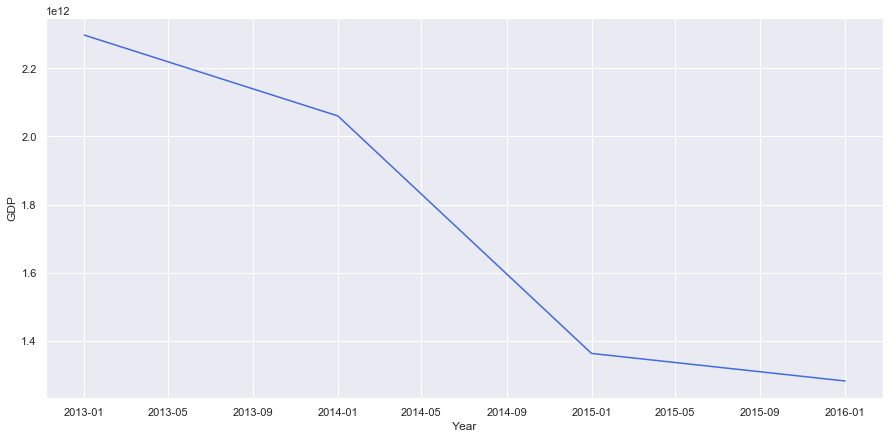

In [25]:
dim = (15, 7)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Year", y="GDP", color = 'royalblue',data=Russia_GDP_interval)

#### Due the GDP is yearly we need to apply a regression to split the year interval in days, apply a simple polynomial regression we can find the estimated value for each day. The polynomial model will use the 4 points in the graph and generate the graph equation through the curve. We use the polynomial regression 4th order, because it will be enough to fit to the graph.

In [26]:
x= [0,365,730,1095]  #2013,2014,2015,2016
y=np.asarray(Russia_GDP_interval['GDP'])
f = np.polyfit(x, y, 4)
polEquation = np.poly1d(f)
print(polEquation)

       4         3             2
2.017 x - 732.8 x - 2.802e+06 x + 3.725e+08 x + 2.297e+12


C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


#### We will export the main dataframe to avoid rework, so I will use the Games - PS3 dataset that we already have to ensure valid structure compative with the mains dataset.

In [27]:
category1_TS = pd.read_csv("category1_TS.csv", sep = ",");

In [28]:
category1_TS = category1_TS.reset_index()
category1_TS = category1_TS.rename(columns = {'index':'Day'}) 
category1_TS.head()

,Day,Date,Price,Freq,Invoice,DayofWeek,Weekofyear,Quarter
0,0,2013-01-01,1479.487115,128,189374.350769,1,1,1
1,1,2013-01-02,1561.694303,525,819889.508928,2,1,1
2,2,2013-01-03,1483.195423,443,657055.572183,3,1,1
3,3,2013-01-04,1532.475859,399,611457.867576,4,1,1
4,4,2013-01-05,1490.351956,399,594650.430267,5,1,1


In [29]:
category1_TS['GDP'] = polEquation(category1_TS['Day'])
category1_TS['Date'] = pd.to_datetime(category1_TS['Date'], format = '%Y.%m.%d')
category1_TS.head()

,Day,Date,Price,Freq,Invoice,DayofWeek,Weekofyear,Quarter,GDP
0,0,2013-01-01,1479.487115,128,189374.350769,1,1,1,2.297128e+12
1,1,2013-01-02,1561.694303,525,819889.508928,2,1,1,2.297498e+12
2,2,2013-01-03,1483.195423,443,657055.572183,3,1,1,2.297862e+12
3,3,2013-01-04,1532.475859,399,611457.867576,4,1,1,2.298220e+12
4,4,2013-01-05,1490.351956,399,594650.430267,5,1,1,2.298573e+12


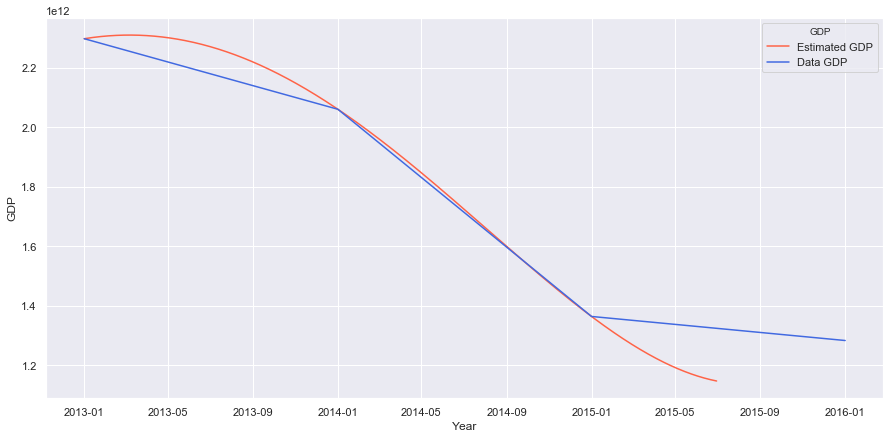

In [30]:
dim = (15, 7)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="GDP", color = 'tomato',data=category1_TS)
ax2 = sns.lineplot(x="Year", y="GDP", color = 'royalblue',data=Russia_GDP_interval)
plt.legend(title='GDP', loc='best', labels=['Estimated GDP', 'Data GDP'])

In [31]:
Russia_GDP_Estimated = pd.DataFrame()
Russia_GDP_Estimated['Date'] = category1_TS['Date']
Russia_GDP_Estimated['GDP'] = category1_TS['GDP']
Russia_GDP_Estimated.to_csv("Russia_GDP_Estimated.csv", header = True, index = False)

In [32]:
Russia_GDP_Estimated.head()

,Date,GDP
0,2013-01-01,2.297128e+12
1,2013-01-02,2.297498e+12
2,2013-01-03,2.297862e+12
3,2013-01-04,2.298220e+12
4,2013-01-05,2.298573e+12


#### So now, we have a estimated Russia GDP values for each day in the interval of our time serie and now we can continue our economic features preparation

# Preparing the Moscow Exchange Data
#### The MOEX is the main ruble-denomiated benchmark of the Russia stock market, it will enable us to understand the Russia economy stock and the influency of stock in the Game Market. The data was found in the link: https://finance.yahoo.com/quote/IMOEX.ME/history/ .

In [33]:
raw_MOEX = pd.read_csv("raw_MOEX.csv", sep = ",");
raw_MOEX.head()

,Date,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD",Unnamed: 7
0,30.06.2015,926.48,939.93,916.06,939.93,488750114,139813401972,NaN
1,29.06.2015,938.73,938.73,921.74,928.03,341186023,138042910445,NaN
2,26.06.2015,940.14,944.23,933.75,943.01,456566033,140271600959,NaN
3,25.06.2015,951.77,956.86,941.32,941.32,349944666,140019336427,NaN
4,24.06.2015,966.98,974.63,949.42,951.45,406391547,141527160993,NaN


#### Like the Rub in Dolar dataframe, we will get only the Open MOEX index value and remove the others datas and fill the weekend IMOEX value with the previous friday days values

In [34]:
del raw_MOEX['Max']
del raw_MOEX['Min']
del raw_MOEX['Trading Volume, USD']
del raw_MOEX['Market Capitalization, USD']
del raw_MOEX['Unnamed: 7']
del raw_MOEX['Close']
raw_MOEX.columns = ['Date', 'IMOEX']
raw_MOEX['Date'] = pd.to_datetime(raw_MOEX['Date'], format = '%d.%m.%Y')
raw_MOEX= raw_MOEX.sort_values(['Date'], ascending=True)
raw_MOEX = raw_MOEX.reset_index()
del raw_MOEX['index']
raw_MOEX.head()

,Date,IMOEX
0,2013-01-08,1526.98
1,2013-01-09,1576.10
2,2013-01-10,1568.59
3,2013-01-11,1572.00
4,2013-01-14,1571.73


In [35]:
raw_MOEX.set_index('Date', inplace=True)
raw_MOEX = raw_MOEX.resample('D').sum()
raw_MOEX['IMOEX'] = raw_MOEX['IMOEX'].replace(0, np.nan)
for n,i in enumerate(raw_MOEX['IMOEX']):
        if np.isnan(raw_MOEX['IMOEX'][n]):
            raw_MOEX['IMOEX'][n] = raw_MOEX['IMOEX'][n-1]
raw_MOEX = raw_MOEX.reset_index()
raw_MOEX.head(7)

,Date,IMOEX
0,2013-01-08,1526.98
1,2013-01-09,1576.10
2,2013-01-10,1568.59
3,2013-01-11,1572.00
4,2013-01-12,1572.00
5,2013-01-13,1572.00
6,2013-01-14,1571.73


#### As we can notice the dataframe are starting in 8 jan 2013 and the others datas is starting in 1 jan 2013. So we have to complete the lacuna, so to fix it easily we will creating a dataframe to concat it to raw_moex and complete the diference in the date.

In [36]:
df_concat = pd.DataFrame()
df_concat['Date']=category1_TS['Date'][:7]
df_concat['IMOEX'] = raw_MOEX['IMOEX'][0]
MOEX= pd.concat([df_concat,raw_MOEX])
MOEX.shape

(911, 2)

In [37]:
MOEX.to_csv("MOEX.csv", header = True, index = False)

# Preparing the Russia unemployment rate data

#### We could find this dataset in: https://fred.stlouisfed.org/series/LMUNRRTTRUM156S

In [38]:
raw_unemployment = pd.read_csv("raw_unemployment.csv", sep = ",")
raw_unemployment.columns = ['Date','Unemployment_rate']
raw_unemployment.head()

,Date,Unemployment_rate
0,1991-07-01,0.064580
1,1991-08-01,0.085650
2,1991-09-01,0.151737
3,1991-10-01,0.144985
4,1991-11-01,0.128542


In [39]:
raw_unemployment['Date'] = pd.to_datetime(raw_unemployment['Date'], format = '%Y.%m.%d')
raw_unemployment= raw_unemployment.sort_values(['Date'], ascending=True)
raw_unemployment.head()

,Date,Unemployment_rate
0,1991-07-01,0.064580
1,1991-08-01,0.085650
2,1991-09-01,0.151737
3,1991-10-01,0.144985
4,1991-11-01,0.128542


#### The unemployment rate data is resampled monthly, so we need to convert it to daily to use it as a feature. First we will selecting the interval wanted and then apply the resample.

In [40]:
raw_unemployment = raw_unemployment[258:289]
raw_unemployment = raw_unemployment.reset_index()
del raw_unemployment['index']
raw_unemployment.head()

,Date,Unemployment_rate
0,2013-01-01,1.349145
1,2013-02-01,1.310942
2,2013-03-01,1.270595
3,2013-04-01,1.282455
4,2013-05-01,1.257711


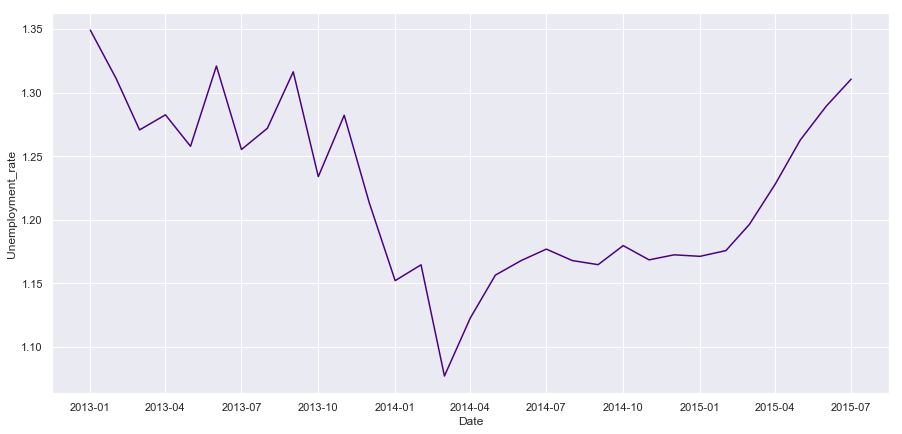

In [41]:
dim = (15, 7)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="Unemployment_rate", color = 'indigo',data=raw_unemployment)

In [42]:
raw_unemployment.shape

(31, 2)

In [43]:
x= np.linspace(0,930,31)  # firstday, lastday, number of samples
y=np.asarray(raw_unemployment['Unemployment_rate'])
f = np.polyfit(x, y, 20)
polEquation = np.poly1d(f)
print(polEquation)

            20            19             18             17
-1.442e-51 x  + 1.17e-47 x  - 4.223e-44 x  + 8.795e-41 x 
              16             15             14             13
 - 1.122e-37 x  + 7.903e-35 x  - 2.171e-33 x  - 6.347e-29 x 
              12            11             10             9
 + 8.105e-26 x  - 6.03e-23 x  + 3.121e-20 x  - 1.182e-17 x
              8             7             6             5             4
 + 3.327e-15 x - 6.944e-13 x + 1.059e-10 x - 1.145e-08 x + 8.379e-07 x
              3             2
 - 3.832e-05 x + 0.0009643 x - 0.0112 x + 1.349


C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
category1_TS['UnemploymentRate'] = polEquation(category1_TS['Day'])
category1_TS['Date'] = pd.to_datetime(category1_TS['Date'], format = '%Y.%m.%d')
category1_TS.head()

,Day,Date,Price,Freq,Invoice,DayofWeek,Weekofyear,Quarter,GDP,UnemploymentRate
0,0,2013-01-01,1479.487115,128,189374.350769,1,1,1,2.297128e+12,1.349194
1,1,2013-01-02,1561.694303,525,819889.508928,2,1,1,2.297498e+12,1.338923
2,2,2013-01-03,1483.195423,443,657055.572183,3,1,1,2.297862e+12,1.330362
3,3,2013-01-04,1532.475859,399,611457.867576,4,1,1,2.298220e+12,1.323310
4,4,2013-01-05,1490.351956,399,594650.430267,5,1,1,2.298573e+12,1.317582


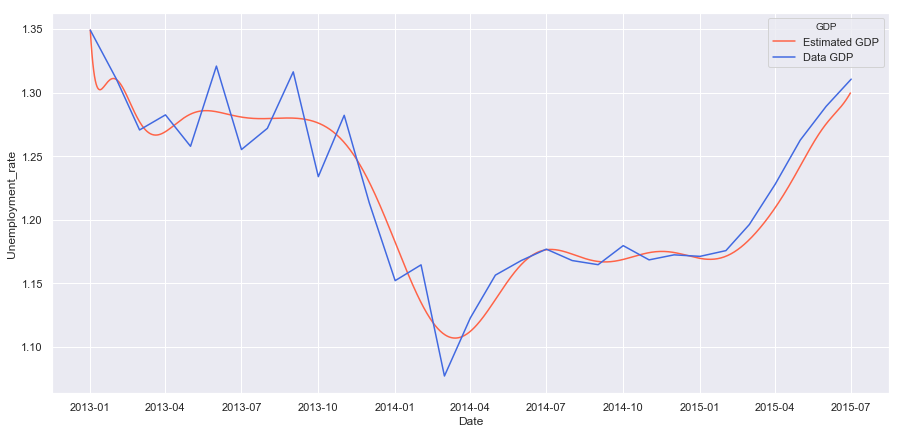

In [45]:
dim = (15, 7)
fig, ax = plt.subplots(figsize=dim)
ax = sns.lineplot(x="Date", y="UnemploymentRate", color = 'tomato',data=category1_TS)
ax2 = sns.lineplot(x="Date", y="Unemployment_rate", color = 'royalblue',data=raw_unemployment)
plt.legend(title='GDP', loc='best', labels=['Estimated GDP', 'Data GDP'])

In [46]:
unemploymentRate = pd.DataFrame()
unemploymentRate['Date'] = category1_TS['Date']
unemploymentRate['UnempRate'] = category1_TS['UnemploymentRate']
unemploymentRate.to_csv("unemploymentRate.csv", header = True, index = False)